        U_ID       CODEBASE         CODE1     CODE2   TOWN_ID TOWN COUNTY_ID  \
4408   14084  A6503-1630-00  A6503-E6-005  A6503-E6  65000030  中和區     65000   
4417   14270  A6503-1648-00  A6503-E4-006  A6503-E4  65000030  中和區     65000   
4442   14593  A6503-1667-00  A6503-E6-009  A6503-E6  65000030  中和區     65000   
4554   13906  A6503-1616-00  A6503-E6-004  A6503-E6  65000030  中和區     65000   
4558   13910  A6503-1604-00  A6503-D9-008  A6503-D9  65000030  中和區     65000   
...      ...            ...           ...       ...       ...  ...       ...   
12935  10395  A6503-0120-00  A6503-11-009  A6503-11  65000030  中和區     65000   
12937  10397  A6503-0140-00  A6503-04-007  A6503-04  65000030  中和區     65000   
12939  10399  A6503-0145-00  A6503-10-009  A6503-10  65000030  中和區     65000   
12940  10400  A6503-0136-00  A6503-10-007  A6503-10  65000030  中和區     65000   
12941  10401  A6503-0123-00  A6503-19-002  A6503-19  65000030  中和區     65000   

      COUNTY             X             

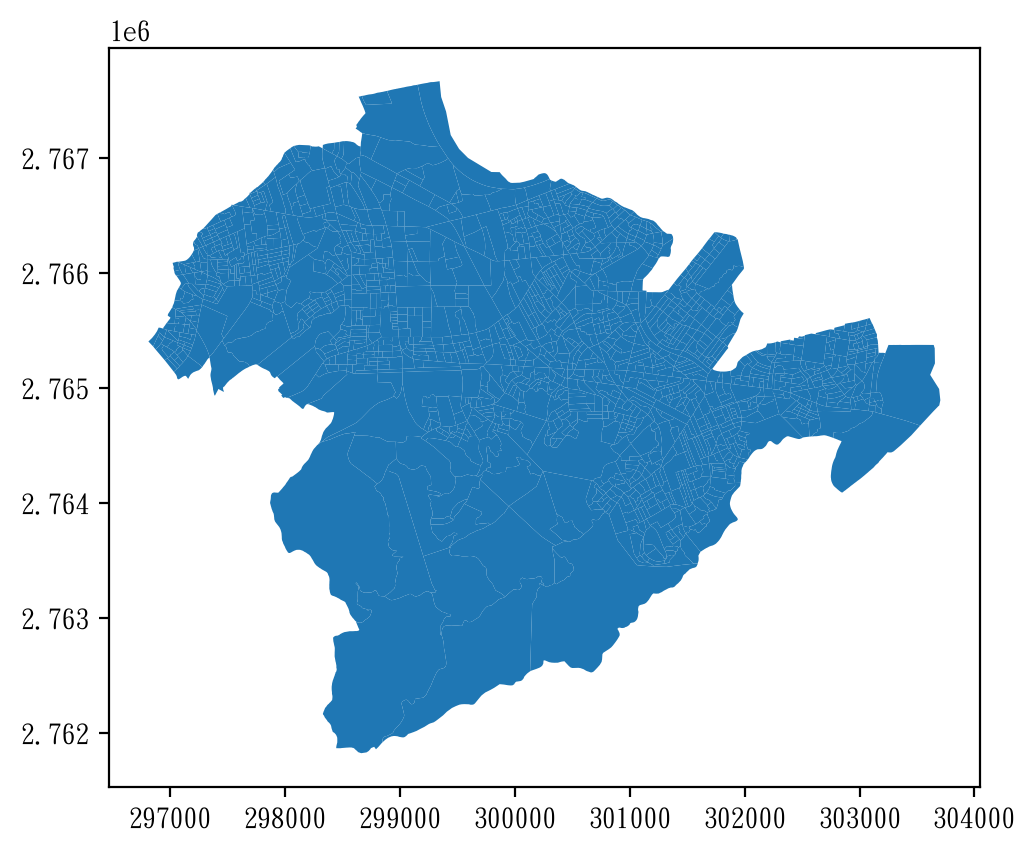

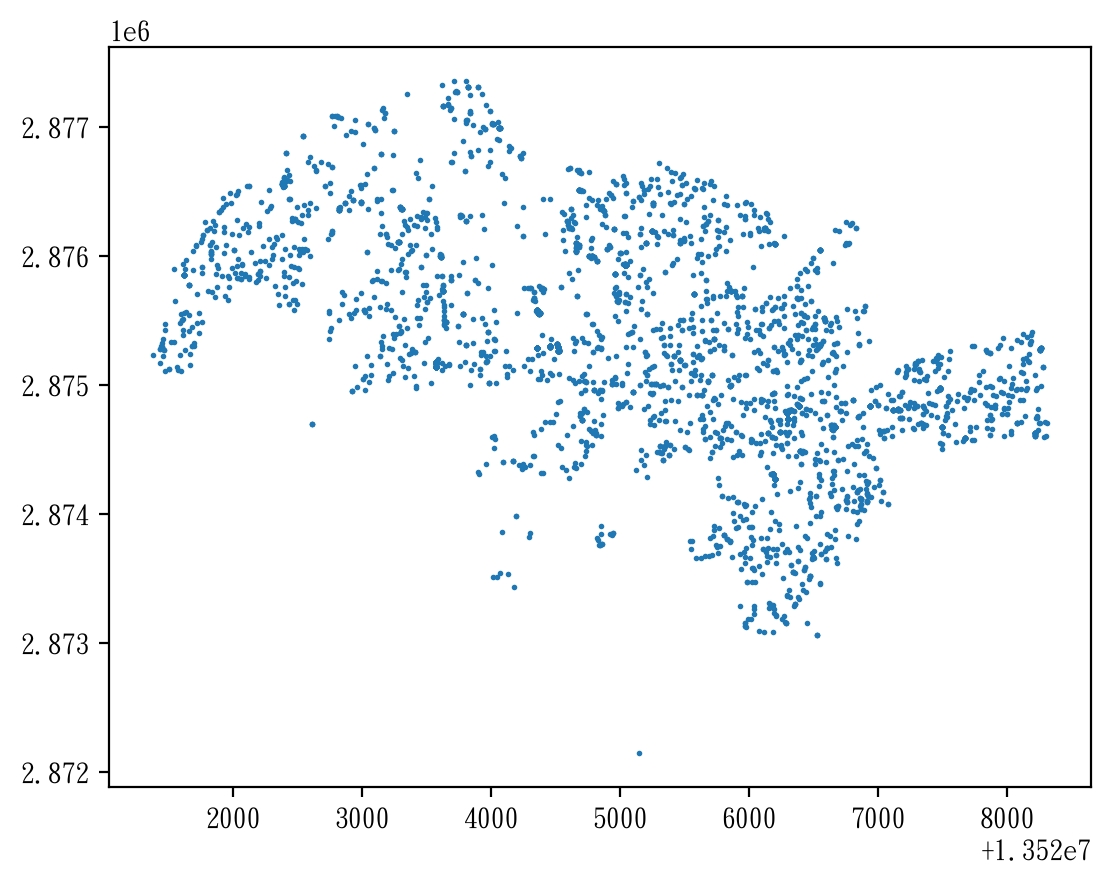

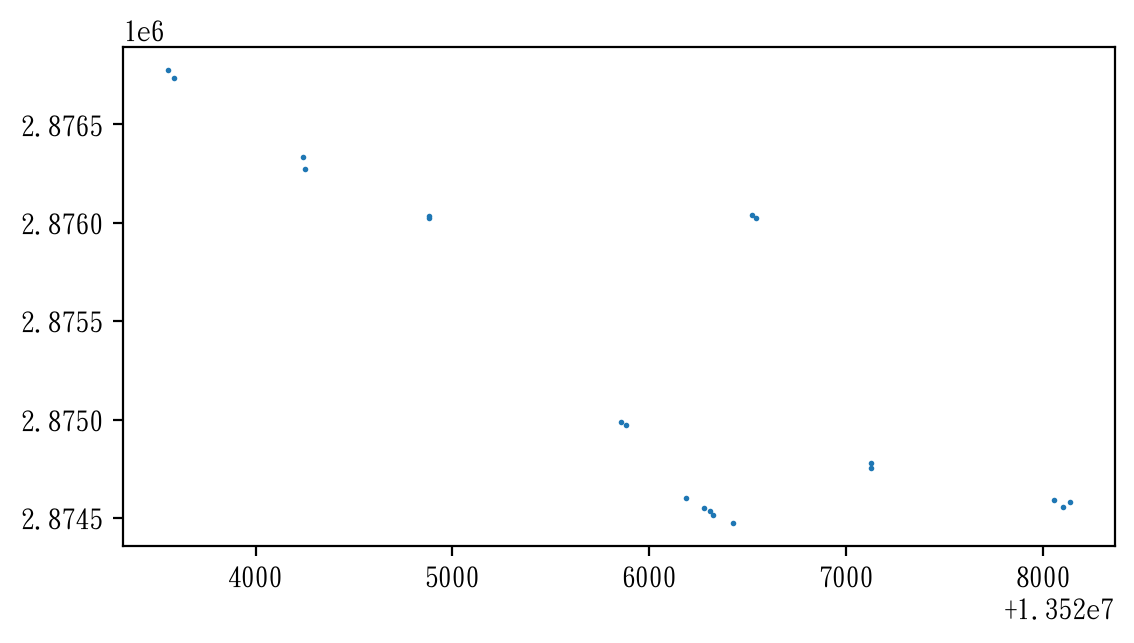

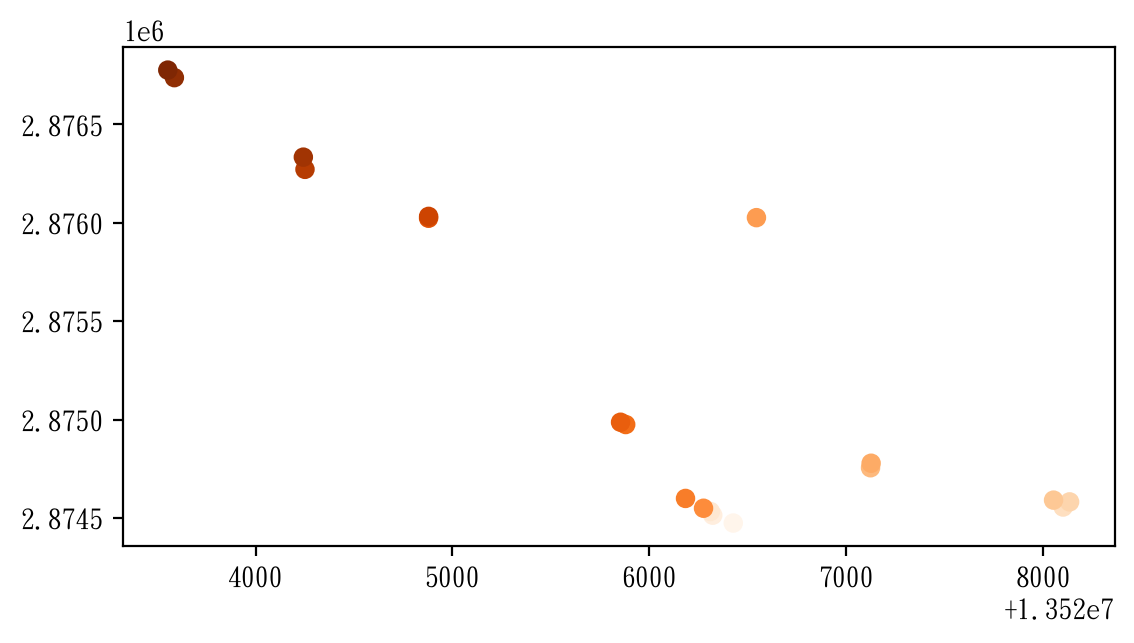

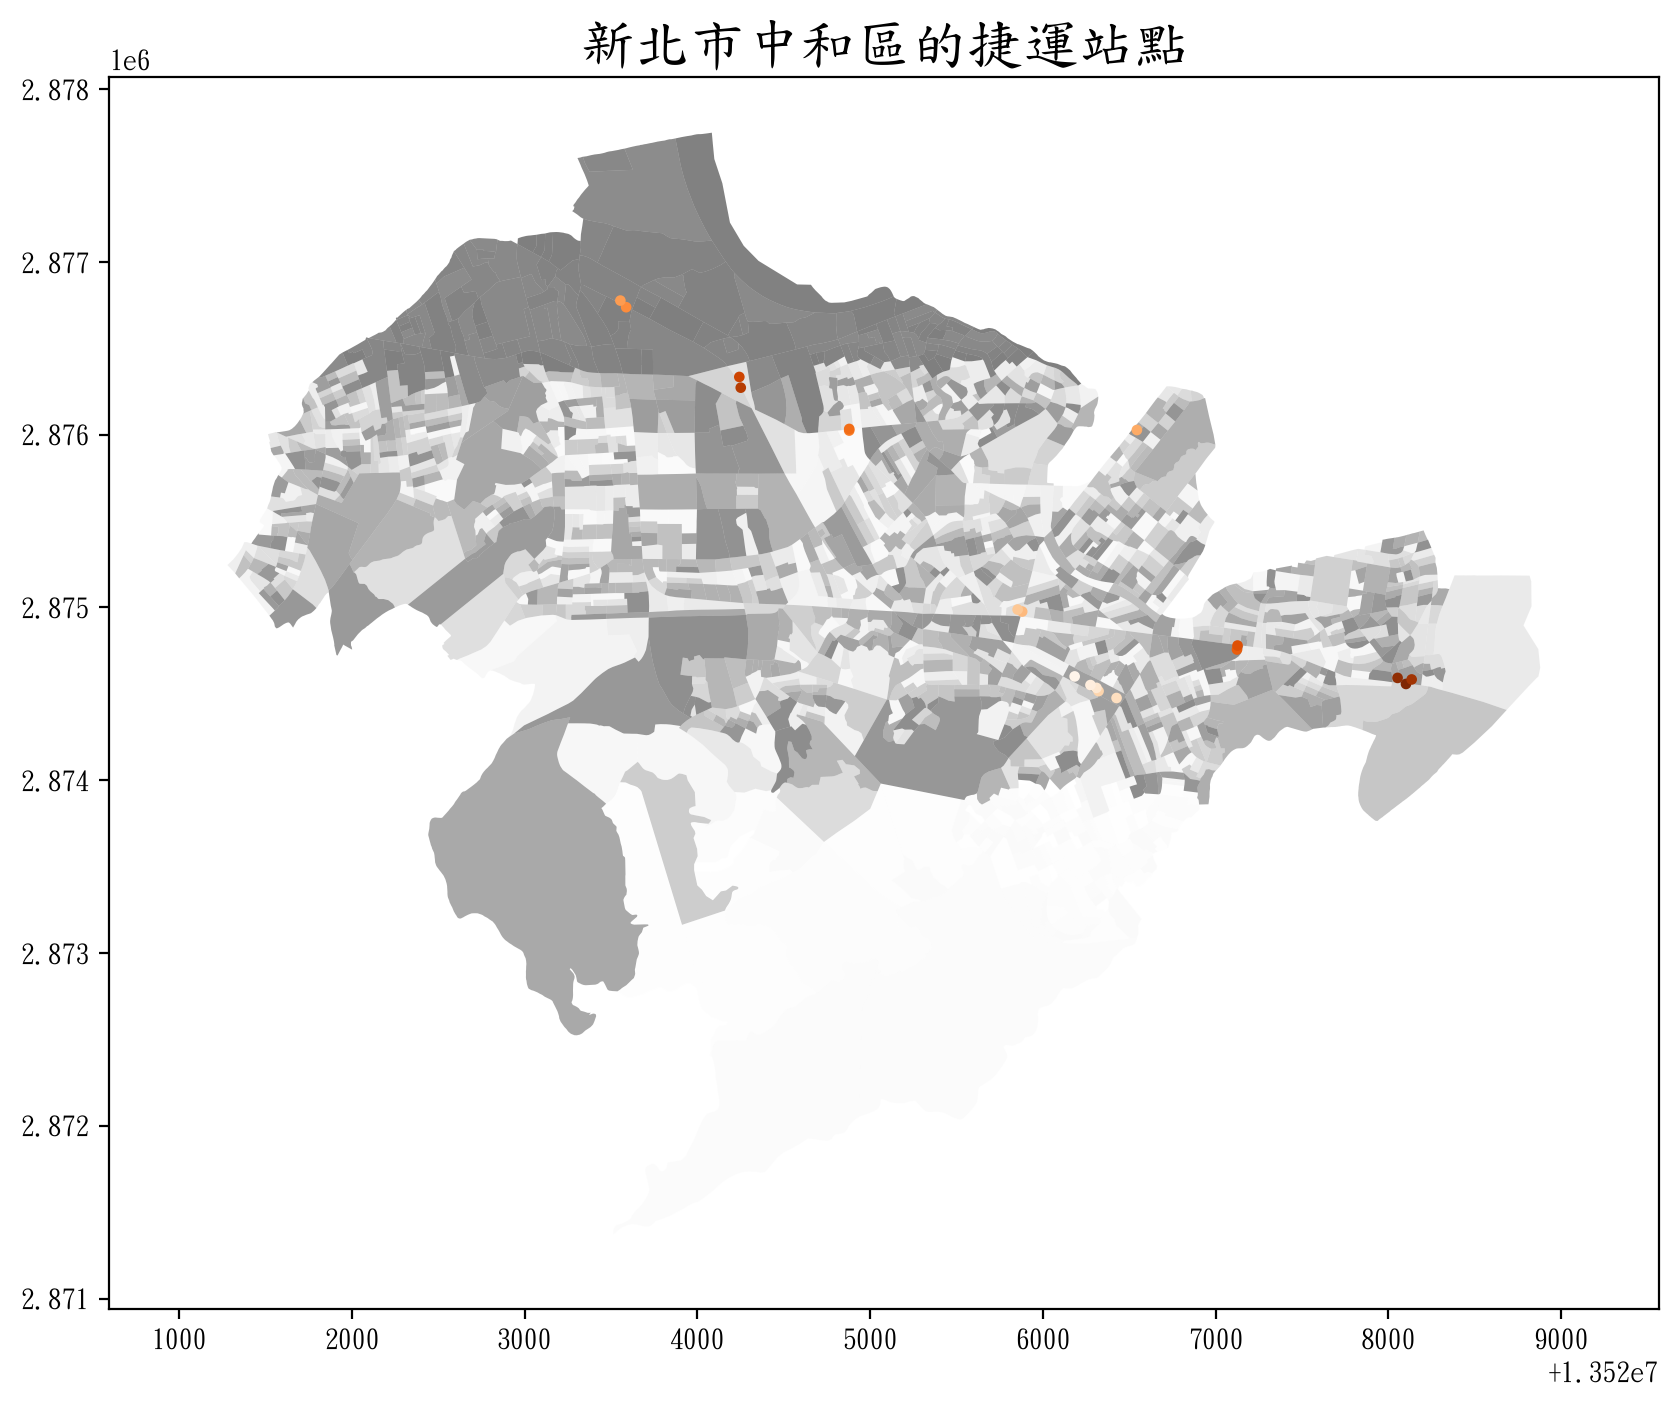

C:\Users\chibisakura\AppData\Local\Temp\ipykernel_15140\1950735465.py:68: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  clip_station.plot(color = 'red', ax = ax,
C:\Users\chibisakura\AppData\Local\Temp\ipykernel_15140\1950735465.py:70: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  Zhonghe_District_real_estate_gdf.plot(color = 'green', ax = ax,


Text(0.5, 1.0, '距捷運站距離實價登錄房屋分佈圖')

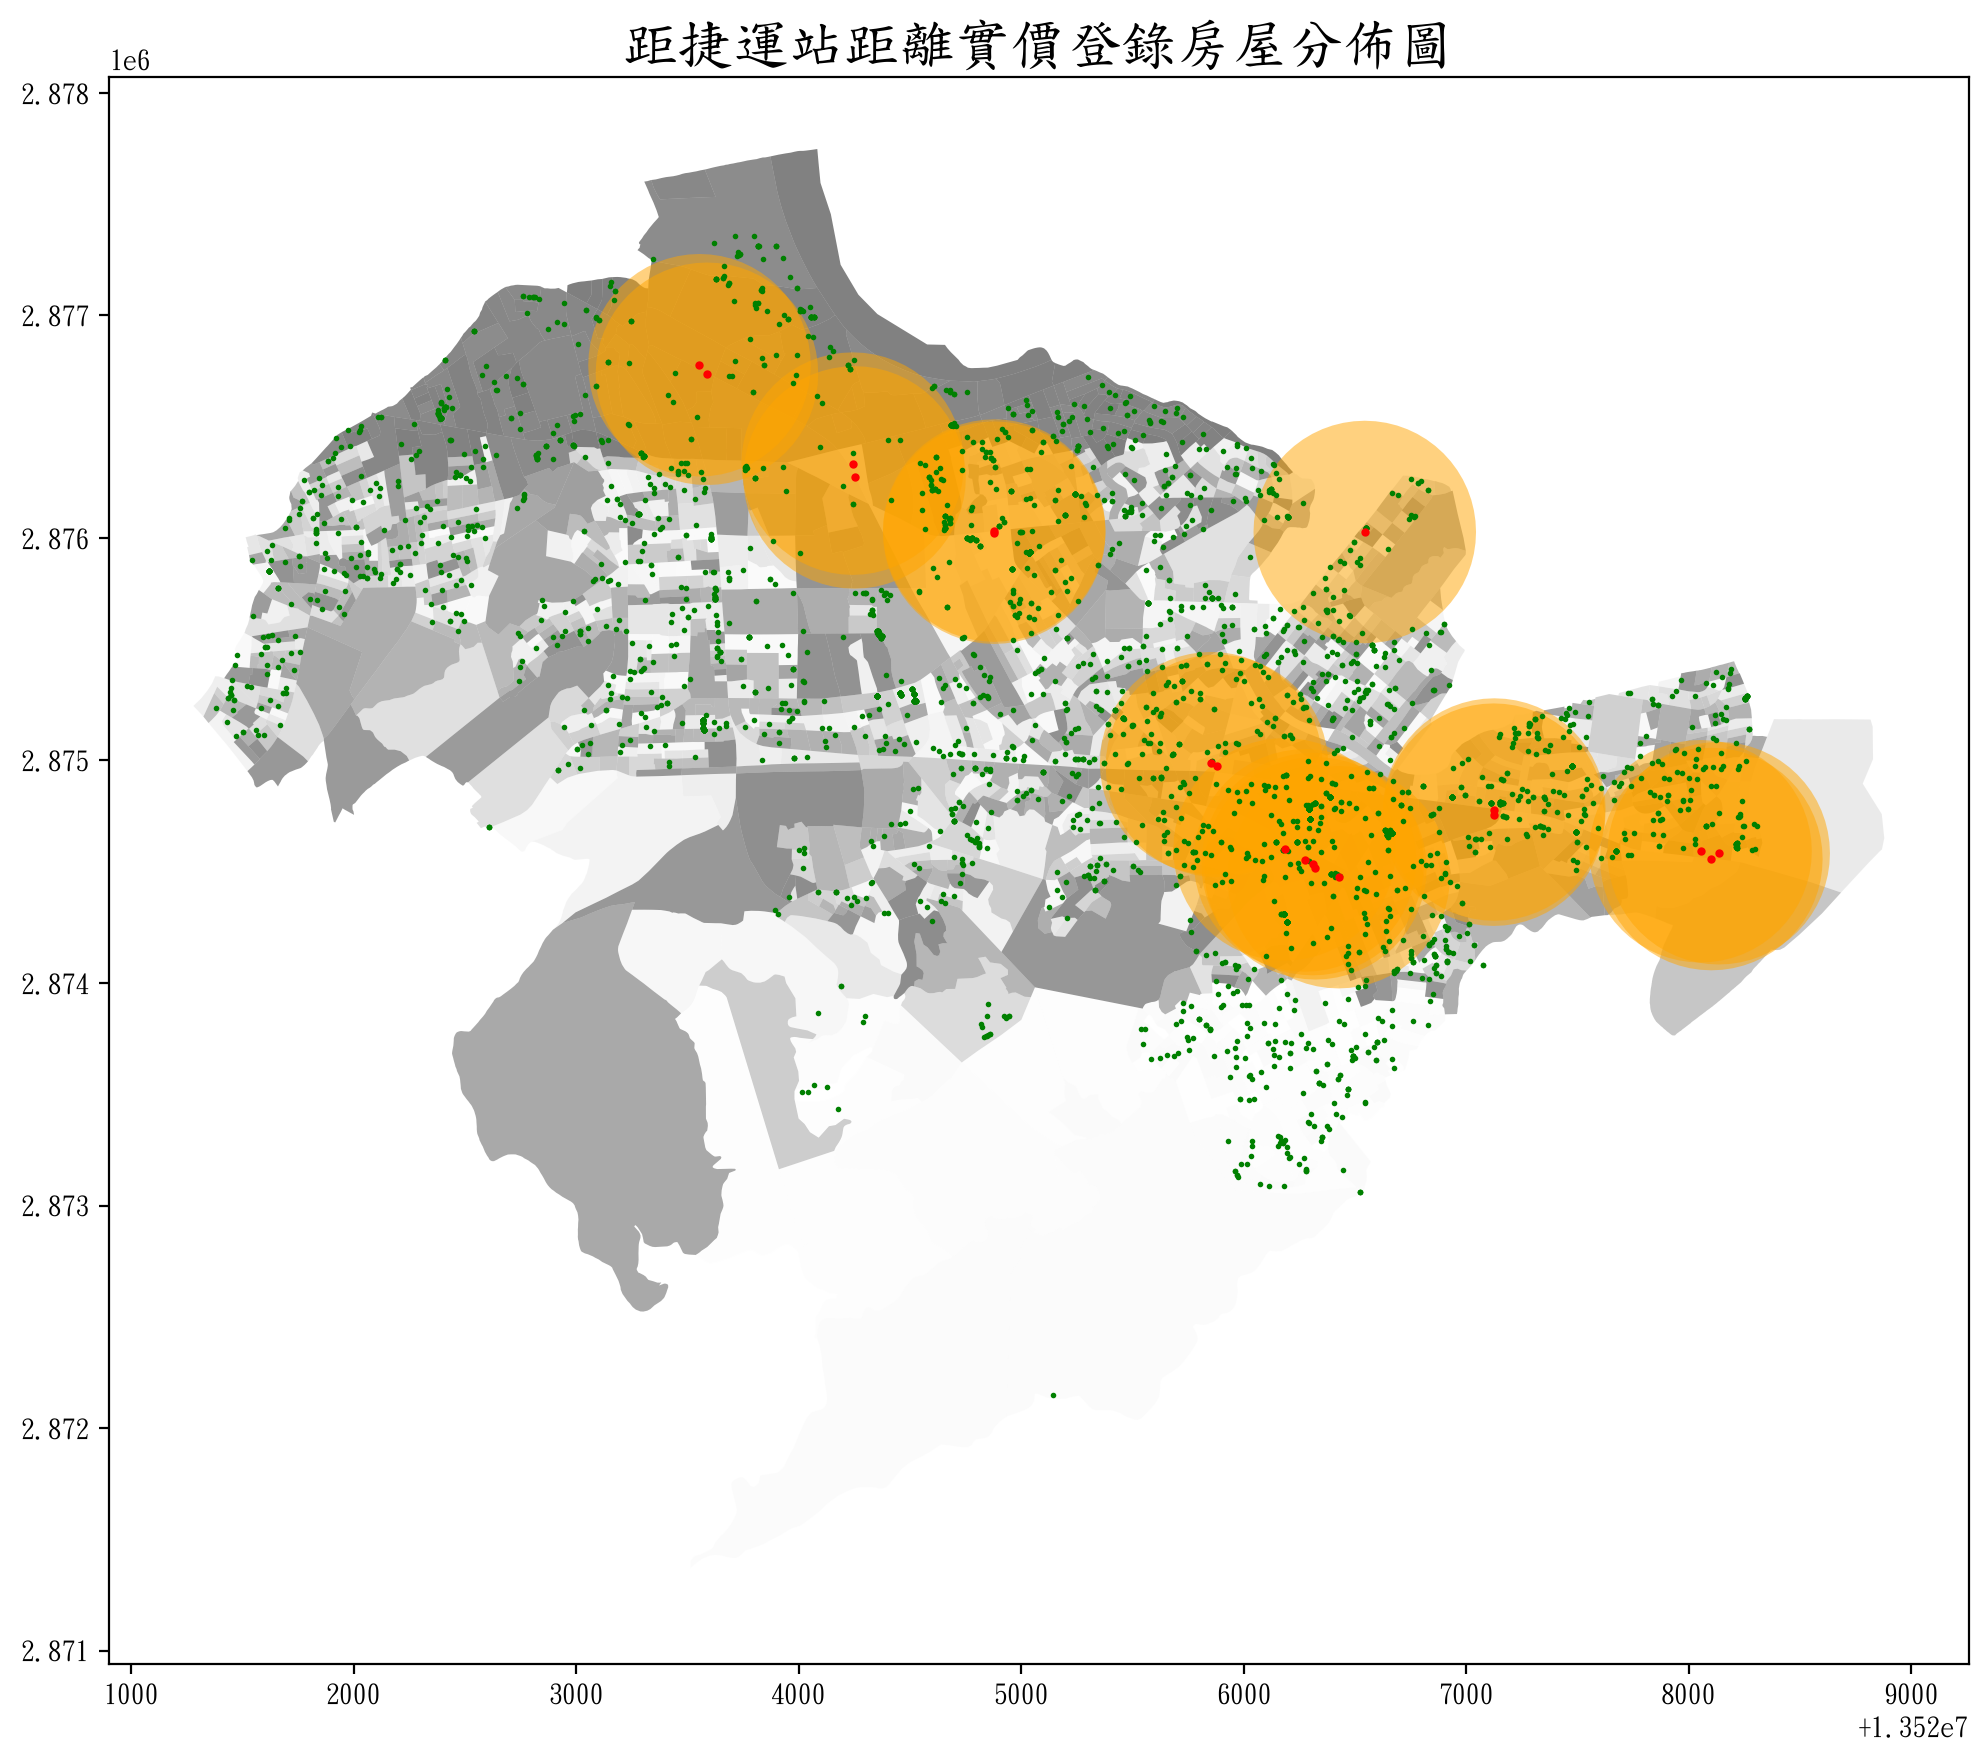

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# 將圖表標題改為標楷體
import matplotlib
matplotlib.rc('font', family = 'DFKai-SB')

# 提高jupyter notebook圖形顥示解析度
%config InlineBackend.figure_format = 'retina'


# 讀取新北市中和區範圍的shp
county_data = gpd.read_file('./圖像資料/0-65000/G97_65000_U0200_2015.shp')
county_data.head()
Zhonghe_District_data = county_data[(county_data['TOWN'] == '中和區')]
print(Zhonghe_District_data)
Zhonghe_District_data.plot()

# 將'real_estate_cleaned.csv'轉成geopandas
Zhonghe_District_real_estate_df = pd.read_csv('./data/real_estate_cleaned.csv', encoding = 'utf-8')
Zhonghe_District_real_estate_gdf = gpd.GeoDataFrame(
    Zhonghe_District_real_estate_df, geometry = gpd.points_from_xy(Zhonghe_District_real_estate_df.Lng, Zhonghe_District_real_estate_df.Lat)
)
Zhonghe_District_real_estate_gdf.head()
# set CRS and transform crs
Zhonghe_District_real_estate_gdf.crs = 'EPSG:4326'
Zhonghe_District_real_estate_gdf = Zhonghe_District_real_estate_gdf.to_crs(epsg = 3857)
Zhonghe_District_real_estate_gdf.plot(markersize = 1)

# 讀取全台捷運車站
MRT_data = gpd.read_file('./圖像資料/MARK_捷運車站_1140206/MARK_捷運車站_1140206.shp', encoding = 'utf-8')
Zhonghe_MRT_data = MRT_data[MRT_data['ADDRESS'].str.contains('新北市中和區', na = False)]
Zhonghe_MRT_data.head()
Zhonghe_MRT_data = Zhonghe_MRT_data.to_crs(epsg = 3857)

Zhonghe_MRT_data.plot(markersize = 1)


# 用Clip切割圖層
Zhonghe_District_data = Zhonghe_District_data.to_crs(epsg = 3857)
clip_station = gpd.clip(Zhonghe_MRT_data, Zhonghe_District_data)
print(clip_station.head())
clip_station.plot(cmap = 'Oranges')

fig, ax = plt.subplots()
fig.figure.set_size_inches(10, 8)

Zhonghe_District_data.plot(cmap = 'Greys',
                                  ax = ax,
                                  alpha = 0.5)
clip_station.plot(cmap = 'Oranges', ax = ax,
                 column = 'MARKNAME2', markersize = 8, zorder = 2)
plt.axis('equal')
plt.title('新北市中和區的捷運站點', fontsize = 20)

plt.show()


# 使用環域分析來看出捷運站方圓500公尺內實價登錄房屋分佈
buffer_station = clip_station.buffer(500)

fig, ax = plt.subplots(figsize = (12, 12))
Zhonghe_District_data.plot(cmap = 'Greys', ax = ax, alpha = .5)

buffer_station.plot(ax = ax,
                    alpha = .5, color = 'orange', zorder = 1)
clip_station.plot(color = 'red', ax = ax,
                 column = 'MARKNAME2', markersize = 4, zorder = 4)
Zhonghe_District_real_estate_gdf.plot(color = 'green', ax = ax,
                                column = '土地區段位置建物區段門牌',markersize = 1, zorder = 3)
plt.title('距捷運站距離實價登錄房屋分佈圖', fontsize = 20)


In [7]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
import math

'''
MarkerCluster 將地圖上相鄰記點(Markers)群組在一起，當縮放地圖時，這些群組會根據地圖的縮放級別(Zoom Level)動態顥示或隱藏。
當縮小地圖時，標記點的群組會變得更大；當放大地圖時，標記點的群組會分解為更小的群組或單個標記點。
'''
marker_cluster = MarkerCluster()
Zhonghe_map = folium.Map(location = [24.9972, 121.5042], tiles = 'openstreetmap', zoom_start = 15)

Zhonghe_real_estate = pd.read_csv('./data/real_estate_cleaned.csv', encoding = 'utf-8')
for idx, row in Zhonghe_real_estate.iterrows():
    if not math.isnan(row['Lng']) and not math.isnan(row['Lat']):
        marker_cluster.add_child(folium.Marker([row['Lat'], row['Lng']], popup = row['土地區段位置建物區段門牌']))
Zhonghe_map.add_child(marker_cluster)